In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Changed confusion_mat to confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:

# Step 2: Load Dataset
df = pd.read_csv("tweets.csv") # Replace with your path
print("Original Columns:", df.columns)
# Preview the dataset
print(df[['text', 'location']].head())

Original Columns: Index(['id', 'created_at', 'text', 'location'], dtype='object')
                                                text            location
0  @CIBC please explain to me why I want to remai...              Canada
1  RT @CIBCLiveLabs: We are pleased to announce, ...     Oshawa, Ontario
2  CIBC World Markets Inc. Decreases Holdings in ...     The Netherlands
3  Le patron de la Banque @cibc s’attend à un ral...            Montréal
4  Your home is a valuable asset. Use your equity...  Lower Mainland, BC


In [5]:
# Step 3: Clean the Tweet Text
def clean_text(text):
 text = re.sub(r"http\S+", "", str(text)) # Remove URLs
 text = re.sub(r"@\S+|#\S+", "", text) # Remove mentions/hashtag
 text = re.sub(r"[^A-Za-z\s]", "", text) # Remove special characte
 text = text.lower()
 return text
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
 return ' '.join([word for word in text.split() if word not in stop_words])
df['clean_text'] = df['text'].apply(clean_text).apply(remove_stopwords)
print("Sample cleaned tweet:")
print(df['clean_text'].head(1).values[0])

Sample cleaned tweet:
please explain want remain card holder called travel concierge number b


In [6]:

# Step 4: Auto-label Tweets Using TextBlob
def get_sentiment(text):
 polarity = TextBlob(text).sentiment.polarity
 return 1 if polarity > 0 else 0
df['label'] = df['clean_text'].apply(get_sentiment)
# Optional: Check sentiment distribution
print("Sentiment counts:")
print(df['label'].value_counts())

Sentiment counts:
label
0    1159
1     792
Name: count, dtype: int64


Accuracy: 0.8363171355498721
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       237
           1       0.84      0.72      0.78       154

    accuracy                           0.84       391
   macro avg       0.84      0.82      0.82       391
weighted avg       0.84      0.84      0.83       391

Accuracy: 0.8363171355498721
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       237
           1       0.84      0.72      0.78       154

    accuracy                           0.84       391
   macro avg       0.84      0.82      0.82       391
weighted avg       0.84      0.84      0.83       391



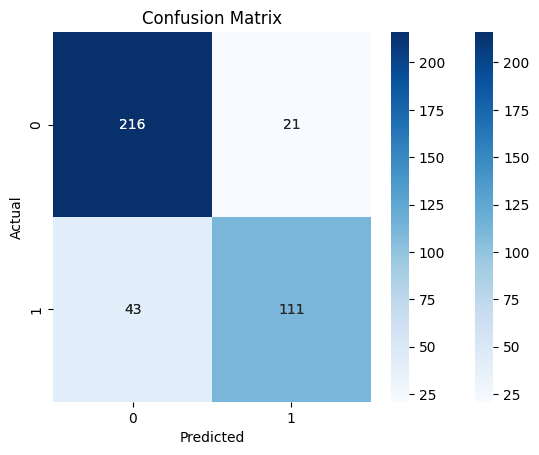

Accuracy: 0.8363171355498721
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       237
           1       0.84      0.72      0.78       154

    accuracy                           0.84       391
   macro avg       0.84      0.82      0.82       391
weighted avg       0.84      0.84      0.83       391



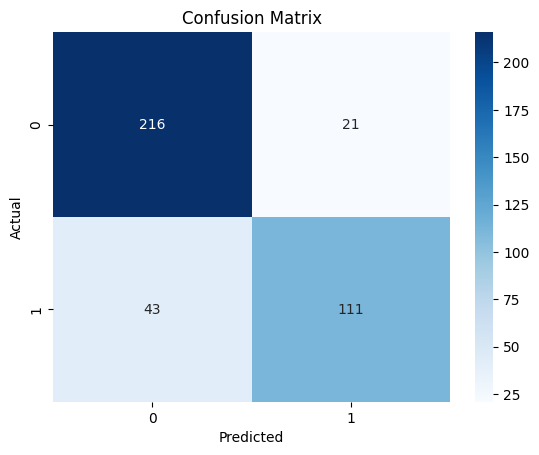

Accuracy: 0.8363171355498721
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       237
           1       0.84      0.72      0.78       154

    accuracy                           0.84       391
   macro avg       0.84      0.82      0.82       391
weighted avg       0.84      0.84      0.83       391

Accuracy: 0.8363171355498721
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       237
           1       0.84      0.72      0.78       154

    accuracy                           0.84       391
   macro avg       0.84      0.82      0.82       391
weighted avg       0.84      0.84      0.83       391



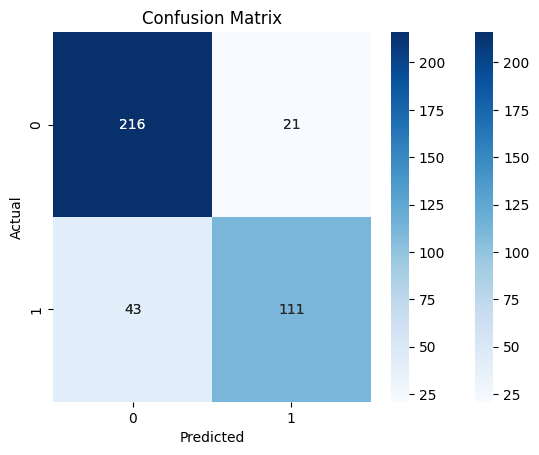

Accuracy: 0.8363171355498721
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       237
           1       0.84      0.72      0.78       154

    accuracy                           0.84       391
   macro avg       0.84      0.82      0.82       391
weighted avg       0.84      0.84      0.83       391



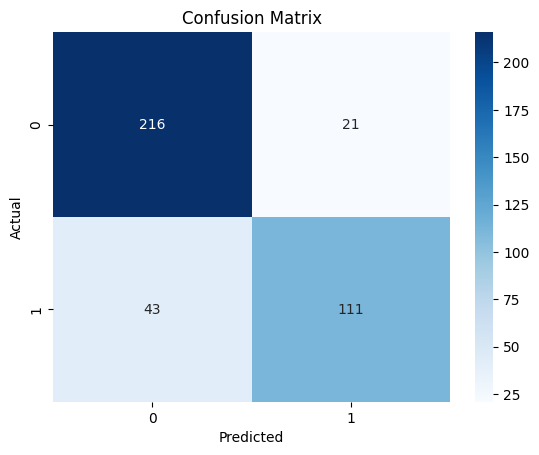

Accuracy: 0.8363171355498721
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       237
           1       0.84      0.72      0.78       154

    accuracy                           0.84       391
   macro avg       0.84      0.82      0.82       391
weighted avg       0.84      0.84      0.83       391



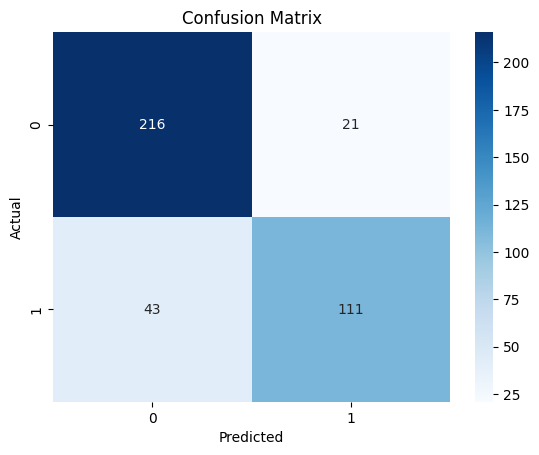

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       237
           1       0.84      0.72      0.78       154

    accuracy                           0.84       391
   macro avg       0.84      0.82      0.82       391
weighted avg       0.84      0.84      0.83       391



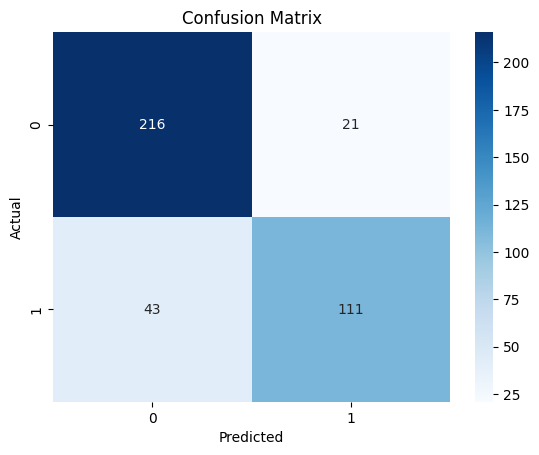

In [10]:
# Step 5: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
# Step 5: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
# Step 5: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
# Step 5: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Step 7: Train a Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Step 8: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Step 5: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
# Step 5: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
# Step 5: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
# Step 5: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Step 7: Train a Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Step 8: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Step 8: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

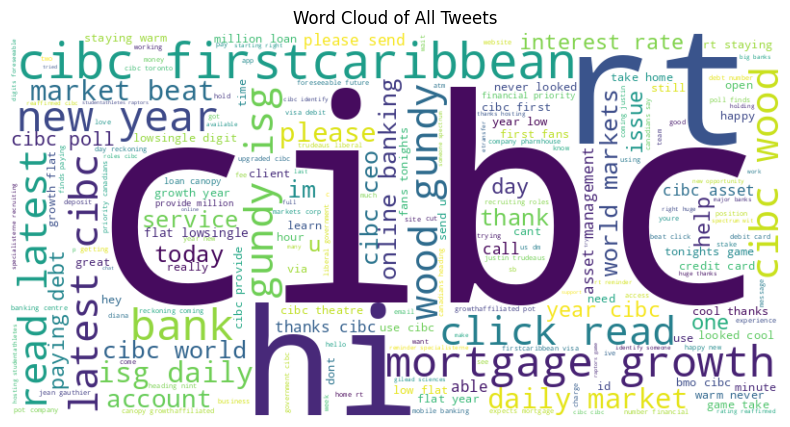

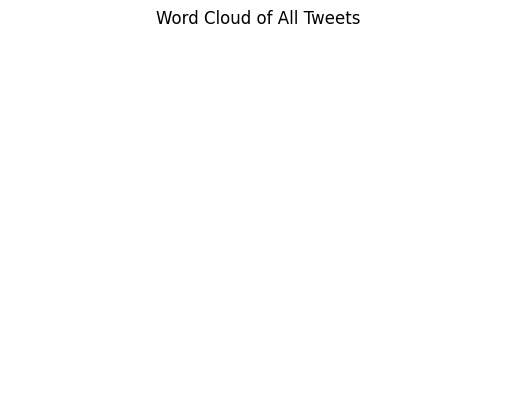

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()